# polynomial (다항)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0,5,size)
    y = x * np.sin(x**2) + 1
    return (x,y)

In [3]:
def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x **2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

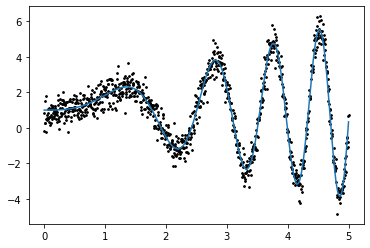

In [4]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

### LinearRegression으로 회귀선을 그리면 제대로 표현을 못 함

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

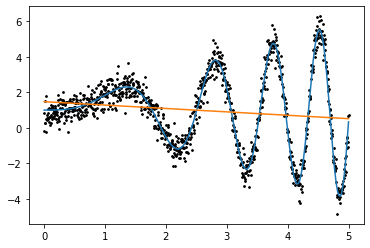

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c = 'black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

### Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:4]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04]])

In [12]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

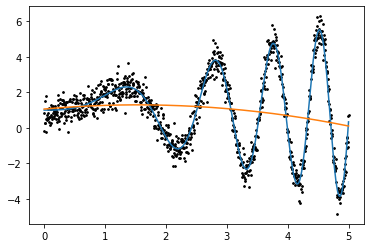

In [13]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s =3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

### Degree 증가해보기 (과적합에 문제가 있을 수 있음)

In [14]:
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)
X_poly[:4]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04, 3.38514528e-06,
        5.08280073e-08, 7.63183292e-10, 1.14592086e-11, 1.72060189e-13,
        2.58348632e-15, 3.87910859e-17, 5.82448738e-19]])

In [15]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

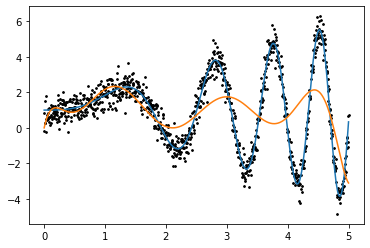

In [16]:
f_x, f_y = f(1000)

plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s =3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

##  How to optimize
- RMSE의 최소값을 찾자
- Ridge, Lasso, LR 모두다 써보자 (SGD는 느리고 쓸필요 없음!) - SGD는 현재 데이터에서 성능이 안 좋음
- Degree를 10~50까지 써보기
- 결과를 한눈에 정리해보기

In [17]:
def rmse(predictions, targets):
    return np.sqrt( ( (predictions - targets) ** 2 ).mean() )

In [18]:
poly_range = list(range(10,30)) # 10 ~30

rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

In [19]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
for poly_vlaue in poly_range:

    poly_features = PolynomialFeatures(degree = poly_vlaue)
    X_poly = poly_features.fit_transform(X)

    lr = LinearRegression()
    lr.fit(X_poly, y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))

    ridge = Ridge()
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))


In [21]:
import pandas as pd

data = {'poly_range' : poly_range, 'lr_rmse' : rmse_lr_list, 'lasso_rmse' : rmse_lasso_list, 'ridge_rmse' : rmse_ridge_list}

df = pd.DataFrame(data).set_index('poly_range')
df.head()

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.909588,2.208097,1.932602
11,1.901646,2.216468,1.914336
12,1.637371,2.221649,1.912464
13,1.351783,2.224733,1.883539
14,1.339019,2.226649,1.710023


In [33]:
df.min()

lr_rmse       0.519969
lasso_rmse    2.208097
ridge_rmse    0.506960
dtype: float64

In [26]:
df['ridge_rmse'].sort_values().head()

poly_range
23    0.506960
22    0.508225
21    0.601901
26    0.656503
27    0.656551
Name: ridge_rmse, dtype: float64

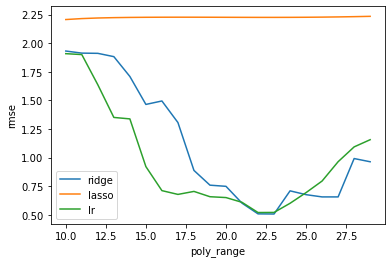

In [35]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lasso_rmse'], label = 'lasso')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.xlabel('poly_range')
plt.ylabel('rmse')
plt.legend()

## Polynomial Features는 언제 사용하는지

- 한개 변수가 Y값과 비선형적인 관계가 있다고 의심( 일부분만 추출해서 사용가능)-슬라이싱을 이용해서
- 주기적인 패턴을 보이는 Series Data
- 모델 자체가 복잡해지면 해결가능한 부분이 많음 (SVM, Tree-based models)